# Mushroom Classification

**Author**: Carlos Alfredo Hernández Alvarez

**Github:** [carloshdez522](https://github.com/carloshdez522?tab=repositories)

**ORCID:** [https://orcid.org/0009-0006-6749-1686](https://orcid.org/0009-0006-6749-1686)

## Introduction
### Disease Description

Mushroom Toxicity: Mushrooms can be classified as either edible or poisonous. Poisonous mushrooms contain toxic compounds that can cause severe health issues or even death if ingested. Accurate classification of mushrooms is crucial for public health and safety.

### Objetive
The goal of this workbook is to provide a comprehensive and practical guide to the use of machine learning techniques and is intended to serve as a basic resource for similar projects in a variety of fields, including bioinformatics.

### Dataset Description
**Context**: This dataset contains various features of mushrooms, including physical characteristics and spore prints, which can be used to classify mushrooms as either edible or poisonous.

#### Attribute Information:
- `cap-diameter`: The diameter of the mushroom cap, usually measured in centimeters.

- `cap-shape`: The shape of the mushroom cap, typically categorized as convex, bell, flat, knobbed, or sunken.

- `gill-attachment`: The way the gills attach to the mushroom stem, categorized as free, attached, or descending.

- `gill-color`: The color of the mushroom gills, which can range from white to black and includes shades of pink, brown, and yellow.

- `stem-height`: The height of the mushroom stem, measured from the base to the cap in centimeters.

- `stem-width`: The width or diameter of the mushroom stem, usually measured at the thickest point.

- `stem-color`: The color of the mushroom stem, which can vary and include white, brown, yellow, and other colors.

- `season`: The season during which the mushroom is typically found, such as spring, summer, autumn, or winter.

- `class`: The classification label indicating whether the mushroom is edible or poisonous.

Kaggle: [**Mushroom Dataset (Binary Classification)**](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data)

## Data Loading and Preprocessing
### Data Loading

In [391]:
import pandas as pd

In [392]:
df = pd.read_csv('Mushroom.csv')
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


### Data Overview

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [394]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [395]:
df.duplicated().sum()

303

### Data Cleaning
Remove duplicates to ensure data quality.

In [396]:
df = df.drop_duplicates().reset_index().drop('index', axis=1)

### Handling Outliers
Use Z-score to remove outliers.

In [397]:
from scipy import stats
import numpy as np

data = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

### Data Normalization
Normalize features for better model performance.

In [398]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(data.drop('class', axis=1))
y = data['class']

### Train-Test Split
Split the data into training and testing sets.

In [399]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

## Model Training and Evaluation
### Model Selection
Use various machine learning models to classify mushrooms.

In [400]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Decision Tree' : DecisionTreeClassifier(),
    'XGBoost' : XGBClassifier(),
    'Random Forest' : RandomForestClassifier()
}

### Model Training
Train each model on the training data.

In [401]:
for name, model in models.items():
  model.fit(x_train, y_train)

### Model Evaluation
Evaluate model performance using classification report.

In [402]:
from sklearn.metrics import classification_report

accuracy = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1-score'])

for name, model in models.items():
  report = classification_report(y_test, model.predict(x_test), output_dict=True)

  accuracy.loc[accuracy.shape[0], 'Model'] = name
  accuracy.loc[accuracy.shape[0] - 1, 'Accuracy'] = report['accuracy']
  accuracy.loc[accuracy.shape[0] - 1, 'Recall'] = report['macro avg']['recall']
  accuracy.loc[accuracy.shape[0] - 1, 'F1-score'] = report['macro avg']['f1-score']

accuracy

,Model,Accuracy,Recall,F1-score
0,Decision Tree,0.974734,0.974538,0.974559
1,XGBoost,0.987566,0.987564,0.987483
2,Random Forest,0.988231,0.988289,0.988154


## Results
### Model Performance Metrics
Visualize model performance using bar charts.

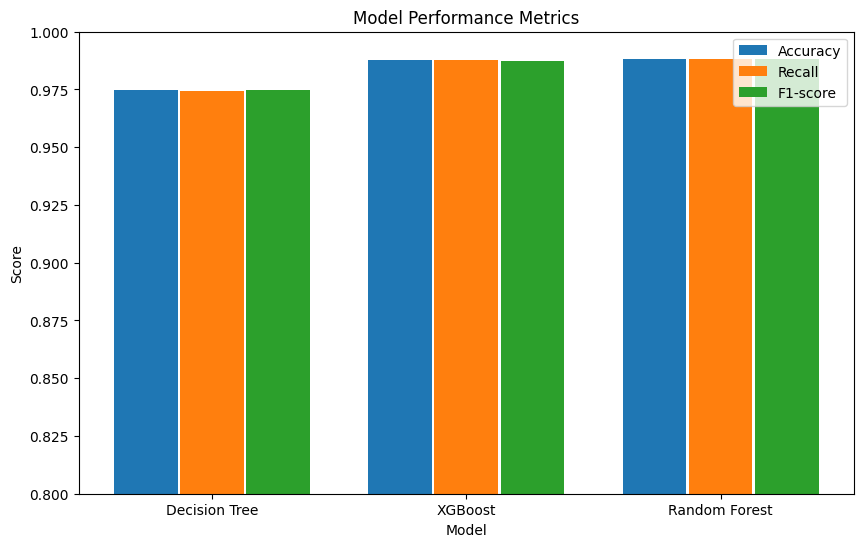

In [403]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
x = np.arange(len(accuracy['Model']))

ax.bar(x - bar_width - 0.01, accuracy['Accuracy'], bar_width, label='Accuracy')
ax.bar(x, accuracy['Recall'], bar_width, label='Recall')
ax.bar(x + bar_width + 0.01, accuracy['F1-score'], bar_width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(accuracy['Model'])
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')

ax.set_ylim(0.8, 1.0)

ax.legend()

plt.show()

## Conclusions
This notebook successfully demonstrates the ability of machine learning algorithms to classify fungi with high accuracy, this underlines the effectiveness of these approaches for prediction.

Furthermore, this analysis can serve as a solid basis for the application of machine learning techniques in other areas of bioinformatics. The methodology followed in this notebook, from data loading and preprocessing to model training and evaluation, is applicable to a wide variety of biological datasets, highlighting the versatility and potential of machine learning in the field of bioinformatics.

## Recommendations for Using this Notebook in Bioinformatics

1. **Disease Classification and Prediction:**
   - **Application:** Utilize the methodology demonstrated in this notebook to classify and predict the presence of diseases based on clinical or genomic data.
   - **Example:** Apply similar preprocessing, feature engineering, and machine learning techniques to datasets containing patient information, such as gene expression levels or clinical test results, to predict the presence or stage of diseases like cancer or diabetes.

2. **Drug Response Prediction:**
   - **Application:** Adapt the notebook to analyze how different genetic or molecular profiles of patients respond to various treatments or drugs.
   - **Example:** Use datasets containing patient genomic data and their responses to specific medications to train models that can predict which patients will benefit from certain treatments, aiding in personalized medicine.

3. **Biomarker Discovery:**
   - **Application:** Employ the data preprocessing and machine learning techniques to identify potential biomarkers for diseases.
   - **Example:** Analyze high-throughput biological data, such as proteomics or metabolomics datasets, to discover biomarkers that are indicative of particular disease states or responses to treatment. This can help in early diagnosis and monitoring of diseases.

By leveraging the comprehensive workflow presented in this notebook—from data loading and cleaning to model training and evaluation—researchers can apply these techniques to various bioinformatics projects, enhancing the accuracy and efficiency of their analyses.